# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [15]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
        
        PCA will reduce feature dimension by find important feature that can represent the data. It will transform data to new axis of that important feature. New axis might be freshness of food, non-food  product. 
        
        ICA can separate blind source. 
        So I think ICA will show source vector for customer's type which maybe a restautant or coffee shop.

###PCA

In [16]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer:  
        
        First 2 dimensions, it is almost the same variance ( 0.46 and 0.40). 
        Variance from dimension after this drop rapidly to 0.07,0.04,0.01 and 0.006. 
        
        I would choose 2 dimensions for analysis,
        because from 3rd dimesion the variance is very small compare to first 2 dimensions.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
    
    First component 
        - [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471].
        - The value is large at Fresh's feature(-0.98).
    
    Second component
        - [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921].
        - Milk(0.52), Grocery(0.77) and Detergent paper(0.37) feature has large value.
    
    - Fresh feature is the most important feature.
    - combination of Milk, Grocery and Detergent paper feature are second important features
    
    To use this information, I will tranform original data to these 2 components vector. 
    Which will reduces number of feature dimension from 6 dimension to 2 dimension and cluster it.

###ICA

In [17]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing
ica = FastICA()
data_scaled = preprocessing.scale(data)
ica.fit(data_scaled)

# Print the independent components
print ica.components_

[[-0.00488144 -0.00161846 -0.00570656 -0.00253177  0.00243056  0.05096543]
 [-0.00266705  0.01393915 -0.06061887 -0.00201878  0.0034072   0.00404491]
 [-0.00193715 -0.07259089  0.05511159  0.00176815 -0.01572906  0.01706906]
 [ 0.0109306   0.00103418 -0.00734899 -0.0540492   0.00264731  0.01676722]
 [-0.00379728  0.01693283  0.11469544 -0.00708664 -0.13435415 -0.01614825]
 [ 0.05022642 -0.00632659 -0.00588772 -0.00328679  0.00977385 -0.00294556]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?


##Answer

    From table below, it show 6 components of ICA decomposition, I hilight a cell that has high absolute value. 
    I interpret that each component are source for difference customer group,
    1st and 6th components for coffee shop. Because they use milk a lot for coffee menu. And milk is high. And grocery is high because is could be used for side dish menu.
    2rd component for fresh market. Because high value of fresh.
    3rd component for restaurant. Because it have high value of fresh, grocery and detergent paper. 
    4th component for grocery store. Because it have high value of grocery and detergent paper.
    5th component for delicatessen store. Because high value of delicatessen.

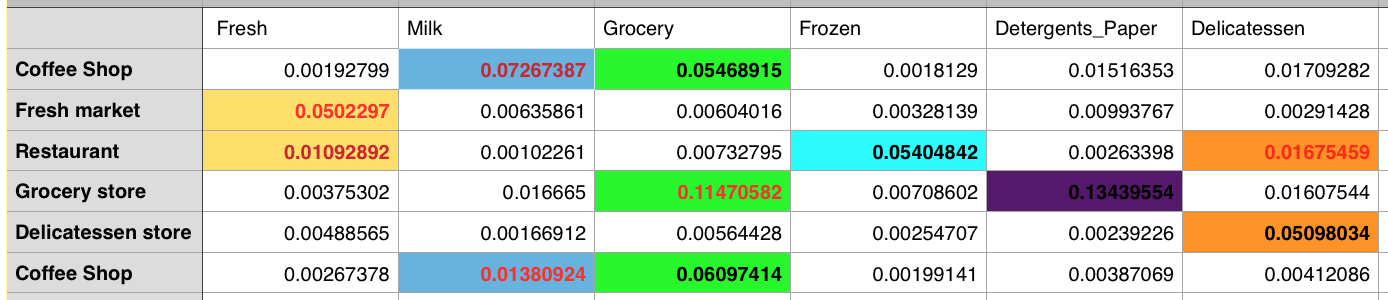

In [18]:
from IPython.display import Image
Image(filename='ica.png') 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
    K Means has is a NP-hard problem but it has heuristic algorithms which will converge to local optimum answer which is fast to compute.
    
    Gaussian Mixture Models use bell-curve distribution which is in nature, because it use probability so one point can belong to more than 1 cluster and it robusts to difference density of cluster.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [19]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [20]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [21]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
num_clusters = 5
kmean = KMeans(n_clusters=num_clusters)
clusters = kmean.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [22]:
# Plot the decision boundary by building a mesh grid to populate a graph.
from sklearn.preprocessing import FunctionTransformer
tranformed_data = reduced_data
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

            

In [23]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = kmean.cluster_centers_ #means_

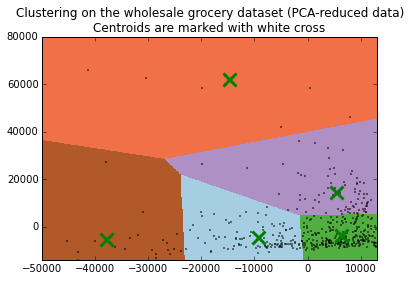

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(tranformed_data[:, 0], tranformed_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='g', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(-50000, x_max)
plt.ylim(y_min, 80000)
#plt.xticks(())
#plt.yticks(())
plt.show()

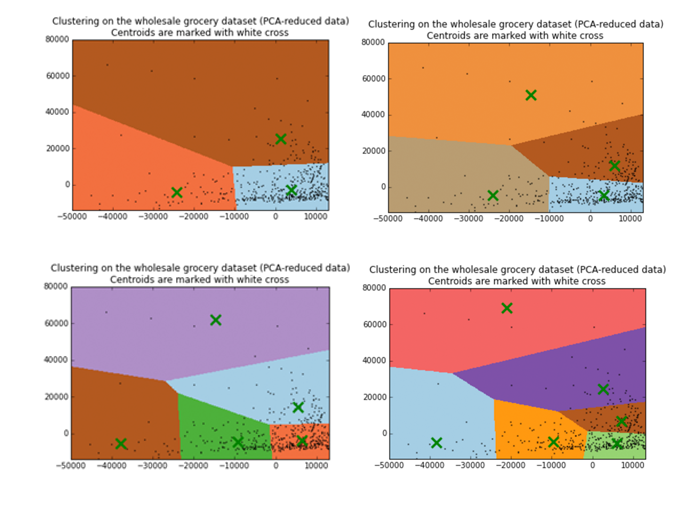

In [25]:
from IPython.display import Image
Image(filename='kmeanall.png') 


Above image show clustering with 3,4,5 and 6 clusters. 5 clusters is the mose appropriate because it has the largest clusters with symetric shape.

**7)** What are the central objects in each cluster? Describe them as customers.

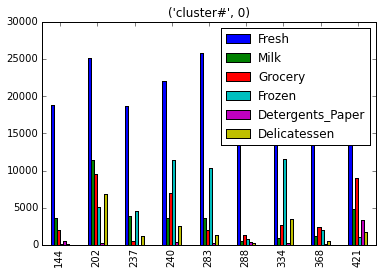

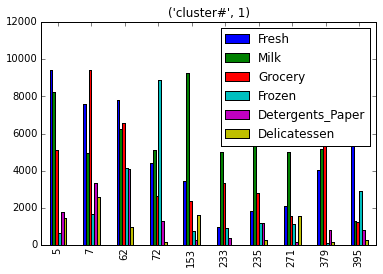

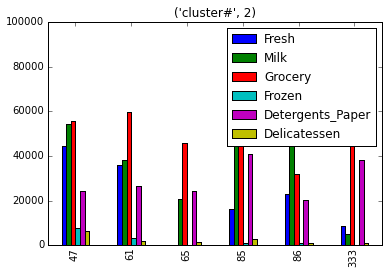

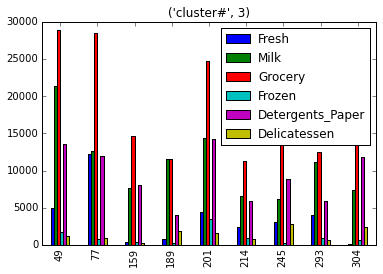

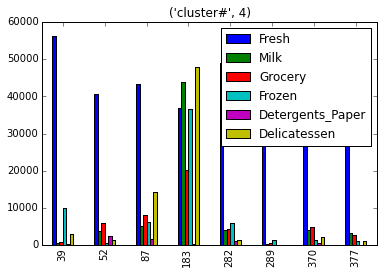

In [34]:
#plot histogram for samples from each cluster
labels = clusters.labels_
sample_size = 10
import random
result = range(sample_size)
for num in range(0,num_clusters):
    count_sample = 0
    while count_sample < sample_size:
        r = random.randint(0, len(reduced_data)-1 )
        if labels[r] == num:
            result[count_sample] = r
            count_sample = count_sample + 1
    sample_data = data[data.index.isin(result)]
    his_title = 'cluster#',num
    sample_data.plot(kind='bar',title=his_title);

Answer: 

Central objects in each cluster are 5 types of customers. 
I sampled some points from each clusters and plot into histogram.

From histogram of sample, 

1. cluster # 0 : customer in this cluster bought high amount of fresh and frozen. > restaurant
2. cluster # 1 : customer in this cluster do not buy any particular type. And all type are less than 10,000.  > Small resturant or cafe 
3. cluster # 2 : customer in this cluster bought grocery and milk. > Coffee shop
4. cluster # 3 : customer in this cluster also bought grocery but larger amount than # 2. > Grocery store
5. cluster # 4 : customer in this cluster also bought fresh but larger amount than # 0. > fresh market

  

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
I feel PCA give the most insight into the data. Because at first with many features I cannot understand what is important or not important. And PCA can tell the important component of features. In this case it tells that fresh and combination of milk, grocery and detergent paper are important components. And from this dimension reduced data I can use it to other technique, which is clustering.  


**9)** How would you use that technique to help the company design new experiments?

Answer: From cluster analysis, we can know the type of customer. For designing new experiment, we can use it for collecting data from control and experiment group from same type of customer. For example, if we want to change the package of milk from plastic to paper because it is good for environments and hope it will encorage customer to buy more milk, we have to test if it is working or not by sell both paper and plastic milk package and see the result from each customer's cluster.

**10)** How would you use that data to help you predict future customer needs?

Answer: We can cluster the customer type and label them a customer class, and use labeled data to train classification model and predict customer's class.

Then, we can use customer class to predict what will they buy. For example fresh market customer want to buy fresh. So if we see fresh market customer type is increasing we can predict the needs of fresh that it will increase.